In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install git+https://github.com/HumanCompatibleAI/overcooked_ai.git

  Cloning https://github.com/HumanCompatibleAI/overcooked_ai.git to /tmp/pip-req-build-mn887481
  Running command git clone --filter=blob:none --quiet https://github.com/HumanCompatibleAI/overcooked_ai.git /tmp/pip-req-build-mn887481


In [3]:
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.agents.agent import AgentPair, FixedPlanAgent, GreedyHumanModel, RandomAgent, SampleAgent
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer

In [3]:
ae = AgentEvaluator.from_layout_name({"layout_name": "cramped_room"}, {"horizon": 100})
trajs = ae.evaluate_human_model_pair()

  0%|          | 0/1 [00:00<?, ?it/s]

Avg rew: 40.00 (std: 0.00, se: 0.00); avg len: 100.00; : 100%|██████████| 1/1 [00:00<00:00, 21.76it/s]


In [5]:
ae.env



X       X       P       X       X       

O                       ↑1      O       

X       ↑0                      X       

X       D       X       S       X       


In [49]:
# action_probs = [ [RandomAgent(all_actions=True).action(state)[1]["action_probs"]]*2 for state in trajs["ep_states"][0]]
#StateVisualizer().display_rendered_trajectory(trajs, ipython_display=True)

In [4]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)

# Now you should be able to import
from interactions import ppo_interaction as ppo
from configs.interaction_configs.ppo_interaction_overcooked import ppo_interaction_config
from configs.agent_configs.a_ppo_agents import actor_configs, critic_configs

trainer = ppo.PPO_interaction(ppo_interaction_config, actor_configs, critic_configs)
train_scores, policy = trainer.train()


  0%|          | 0/5000 [00:00<?, ?it/s]

Computing MotionPlanner


  0%|          | 1/5000 [02:13<185:06:46, 133.31s/it]

Computing MotionPlanner


  0%|          | 2/5000 [04:24<183:16:09, 132.01s/it]

Computing MotionPlanner


  0%|          | 3/5000 [07:49<229:45:05, 165.52s/it]

Computing MotionPlanner


  0%|          | 4/5000 [11:29<259:10:09, 186.75s/it]

Computing MotionPlanner


  0%|          | 5/5000 [14:26<254:38:28, 183.53s/it]

Computing MotionPlanner


  0%|          | 6/5000 [17:46<261:56:24, 188.82s/it]

Computing MotionPlanner


  0%|          | 7/5000 [21:16<271:29:02, 195.74s/it]

Computing MotionPlanner


  0%|          | 8/5000 [24:20<266:30:37, 192.20s/it]

Computing MotionPlanner


  0%|          | 9/5000 [27:13<257:57:52, 186.07s/it]

Computing MotionPlanner


  0%|          | 9/5000 [28:59<267:54:42, 193.24s/it]


KeyboardInterrupt: 

In [96]:
test_scores = trainer.test()

Computing MotionPlanner
Computing MotionPlanner
Computing MotionPlanner
Computing MotionPlanner
Computing MotionPlanner
Computing MotionPlanner


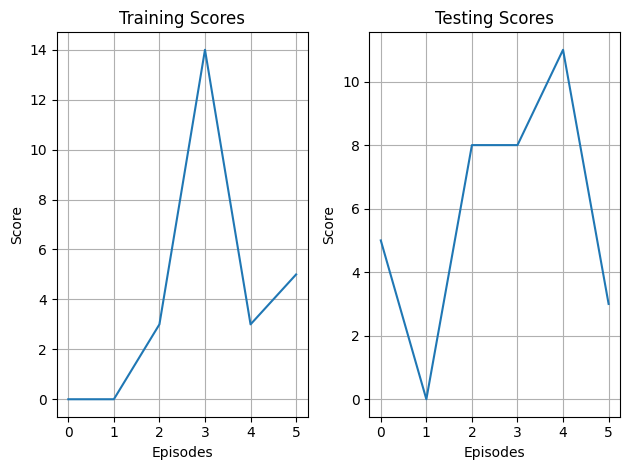

In [132]:
import matplotlib.pyplot as plt

fig, (ax1, ax2)  = plt.subplots(1, 2)
ax1.set_title("Training Scores")
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Score")
ax1.plot(train_scores)
ax1.grid(True)

ax2.set_title("Testing Scores")
ax2.set_xlabel("Episodes")
ax2.set_ylabel("Score")
ax2.plot(test_scores)
ax2.grid(True)
plt.tight_layout()
plt.savefig("PPO_Train_Test")
plt.show()


In [148]:
ae = AgentEvaluator.from_layout_name({"layout_name": "cramped_room"}, {"horizon": 400})
trajs = ae.evaluate_human_model_pair()

Avg rew: 200.00 (std: 0.00, se: 0.00); avg len: 400.00; : 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


In [158]:
print(trajs['ep_states'])

[[<overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x7ffe602881f0>


In [165]:
print(trajs)

{'ep_actions': array([[((0, -1), (1, 0)), ((-1, 0), 'interact'), ('interact', (-1, 0)),
        ((1, 0), (0, -1)), ((1, 0), 'interact'), ((0, 1), (0, 1)),
        ((1, 0), (0, -1)), ((0, -1), (-1, 0)), ('interact', 'interact'),
        ((1, 0), (0, 1)), ('interact', (1, 0)), ((-1, 0), (0, -1)),
        ((-1, 0), (0, -1)), ((-1, 0), (0, -1)), ((0, 1), (-1, 0)),
        ((-1, 0), (1, 0)), ((-1, 0), (1, 0)), ((0, -1), (0, -1)),
        ((-1, 0), (1, 0)), ((-1, 0), (1, 0)), ((0, 1), (1, 0)),
        ((-1, 0), (0, -1)), ((0, -1), 'interact'), ((0, -1), 'interact'),
        ((-1, 0), (1, 0)), ((0, 1), (-1, 0)), ('interact', (-1, 0)),
        ('interact', (0, 1)), ('interact', (0, 1)), ((1, 0), (1, 0)),
        ((0, -1), (-1, 0)), ('interact', (0, 1)),
        ('interact', 'interact'), ((-1, 0), (0, -1)), ((-1, 0), (1, 0)),
        ('interact', (0, -1)), ('interact', 'interact'),
        ((0, 1), (0, 1)), ('interact', (0, -1)),
        ('interact', 'interact'), ((1, 0), (1, 0)), ((0, -1), (-1

In [169]:
action_probs = [[trainer.act(torch.tensor(state, dtype=torch.float32))[1]["action_probs"]]*2 for state in trajs["ep_actions"][0]]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x2 and 96x256)

In [151]:
StateVisualizer().display_rendered_trajectory(trajs, ipython_display=True)

interactive(children=(IntSlider(value=0, description='timestep', max=399), Output()), _dom_classes=('widget-in…